[![View notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PyPartMC/blob/main/examples/cloud_parcel.ipynb)   
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PyPartMC/blob/main/examples/cloud_parcel.ipynb)    
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PyPartMC.git/main?urlpath=lab/tree/examples/cloud_parcel.ipynb)    
[![ARM JupyterHub](https://img.shields.io/static/v1?label=launch%20in&logo=jupyter&color=lightblue&message=ARM+JupyterHub)](https://jupyterhub.arm.gov/hub/user-redirect/git-pull?repo=https%3A//github.com/open-atmos/PyPartMC&branch=main&urlPath=) (requires [logging in with ARM account](https://www.arm.gov/capabilities/computing-resources) and directing Jupyter to a notebook within the cloned repo)

In [1]:
# This file is a part of PyPartMC licensed under the GNU General Public License v3
# Copyright (C) 2024 University of Illinois Urbana-Champaign
# Authors:
#  - https://github.com/compdyn/partmc/graphs/contributors
#  - https://github.com/open-atmos/PyPartMC/graphs/contributors

In [2]:
import sys
import os
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PyPartMC')
elif 'JUPYTER_IMAGE' in os.environ and '.arm.gov' in os.environ['JUPYTER_IMAGE']:
    !pip --quiet install PyPartMC open_atmos_jupyter_utils
    _pypartmc_path = !pip show PyPartMC | fgrep Location | cut -f2 -d' '
    sys.path.extend(_pypartmc_path if _pypartmc_path[0] not in sys.path else [])

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from open_atmos_jupyter_utils import show_plot
import PyPartMC as ppmc
from PyPartMC import si

In [4]:
gas_data = ppmc.GasData((
    "H2SO4", "HNO3", "HCl", "NH3", "NO", "NO2", "NO3", "N2O5", "HONO", "HNO4", "O3",
    "O1D", "O3P", "OH", "HO2", "H2O2", "CO", "SO2", "CH4", "C2H6", "CH3O2", "ETHP",
    "HCHO", "CH3OH", "ANOL", "CH3OOH", "ETHOOH", "ALD2", "HCOOH", "RCOOH", "C2O3",
    "PAN", "ARO1", "ARO2", "ALK1", "OLE1", "API1", "API2", "LIM1", "LIM2", "PAR",
    "AONE", "MGLY", "ETH", "OLET", "OLEI", "TOL", "XYL", "CRES", "TO2", "CRO",
    "OPEN", "ONIT", "ROOH", "RO2", "ANO2", "NAP", "XO2", "XPAR", "ISOP", "ISOPRD",
    "ISOPP", "ISOPN", "ISOPO2", "API", "LIM", "DMS", "MSA", "DMSO", "DMSO2",
    "CH3SO2H", "CH3SCH2OO", "CH3SO2", "CH3SO3", "CH3SO2OO", "CH3SO2CH2OO", "SULFHOX"
))

In [5]:
env_state = ppmc.EnvState({
    "rel_humidity": 0.95,
    "latitude": 0,
    "longitude": 0,
    "altitude": 0 * si.m,
    "start_time": 21600 * si.s,
    "start_day": 200,
})

In [6]:
aero_data = ppmc.AeroData((
    #   density        ions in soln (1)    molecular weight    kappa (1)
    #         \                       \    /                     |
    {"SO4":  [1800 * si.kg / si.m**3, 1,  96.0 * si.g / si.mol, 0.00]},
    {"NO3":  [1800 * si.kg / si.m**3, 1,  62.0 * si.g / si.mol, 0.00]},
    {"Cl":   [2200 * si.kg / si.m**3, 1,  35.5 * si.g / si.mol, 0.00]},
    {"NH4":  [1800 * si.kg / si.m**3, 1,  18.0 * si.g / si.mol, 0.00]},
    {"MSA":  [1800 * si.kg / si.m**3, 0,  95.0 * si.g / si.mol, 0.53]},
    {"ARO1": [1400 * si.kg / si.m**3, 0, 150.0 * si.g / si.mol, 0.10]},
    {"ARO2": [1400 * si.kg / si.m**3, 0, 150.0 * si.g / si.mol, 0.10]},
    {"ALK1": [1400 * si.kg / si.m**3, 0, 140.0 * si.g / si.mol, 0.10]},
    {"OLE1": [1400 * si.kg / si.m**3, 0, 140.0 * si.g / si.mol, 0.10]},
    {"API1": [1400 * si.kg / si.m**3, 0, 184.0 * si.g / si.mol, 0.10]},
    {"API2": [1400 * si.kg / si.m**3, 0, 184.0 * si.g / si.mol, 0.10]},
    {"LIM1": [1400 * si.kg / si.m**3, 0, 200.0 * si.g / si.mol, 0.10]},
    {"LIM2": [1400 * si.kg / si.m**3, 0, 200.0 * si.g / si.mol, 0.10]},
    {"CO3":  [2600 * si.kg / si.m**3, 1,  60.0 * si.g / si.mol, 0.00]},
    {"Na":   [2200 * si.kg / si.m**3, 1,  23.0 * si.g / si.mol, 0.00]},
    {"Ca":   [2600 * si.kg / si.m**3, 1,  40.0 * si.g / si.mol, 0.00]},
    {"OIN":  [2600 * si.kg / si.m**3, 0,   1.0 * si.g / si.mol, 0.10]},
    {"OC":   [1400 * si.kg / si.m**3, 0,   1.0 * si.g / si.mol, 0.10]},
    {"BC":   [1800 * si.kg / si.m**3, 0,   1.0 * si.g / si.mol, 0.00]},
    {"H2O":  [1000 * si.kg / si.m**3, 0,  18.0 * si.g / si.mol, 0.00]},
))

In [7]:
gas_state = ppmc.GasState(gas_data)

In [8]:
AERO_DIST_BACKGROUND = {
    "back_small": {
        "mass_frac": [{"SO4": [1]}, {"OC": [1.375]}, {"NH4": [0.375]}],
        "diam_type": "geometric",
        "mode_type": "log_normal",
        "num_conc": 3.2e9 / si.m**3,
        "geom_mean_diam": 0.02 * si.um,
        "log10_geom_std_dev": 0.161,
    },
}

AERO_DIST_EMIT = {
    "gasoline": {
        "mass_frac": [{"OC": [0.8]}, {"BC": [0.2]}],
        "diam_type": "geometric",
        "mode_type": "log_normal",
        "num_conc": 5e7 / si.m**3,
        "geom_mean_diam": 5e-8 * si.m,
        "log10_geom_std_dev": 0.24,
    },
}

In [9]:
time_timeseries = [0, 1200]
pressure_timeseries = [1e5, 1e5]
temp_timeseries = [290, 280]
height_timeseries = [200, 200]
times = [0 * si.s]
gas_emit_times = [0]

In [10]:
scenario = ppmc.Scenario(
    gas_data,
    aero_data,
    {
        "temp_profile": [{"time": time_timeseries}, {"temp": temp_timeseries}],
        "pressure_profile": [
            {"time": time_timeseries},
            {"pressure": pressure_timeseries},
        ],
        "height_profile": [{"time": time_timeseries}, {"height": height_timeseries}],
        "gas_emissions": [
            {"time": gas_emit_times},
            {"rate": [0.] * len(gas_emit_times)},
        ],
        "gas_background": [
            {"time": times},
            {"rate": [0.0 / si.s] * len(times)},
        ],
        "aero_emissions": [
            {"time": [0 * si.s, 12 * 3600 * si.s]},
            {"rate": [0 / si.s, 0 / si.s]},
            {"dist": [[AERO_DIST_EMIT], [AERO_DIST_EMIT]]},
        ],
        "aero_background": [
            {"time": [0 * si.s]},
            {"rate": [0 / si.s]},
            {"dist": [[AERO_DIST_BACKGROUND]]},
        ],
        "loss_function": "none",
    },
)

In [11]:
T_INITIAL = 0.0
scenario.init_env_state(env_state, T_INITIAL)

In [12]:
AERO_DIST_INIT = [{
    "init_small": {
        "mass_frac": [{"SO4": [1]}, {"OC": [1.375]}, {"NH4": [0.375]}],
        "diam_type": "geometric",
        "mode_type": "log_normal",
        "num_conc": 3.2e9 / si.m**3,
        "geom_mean_diam": 0.02 * si.um,
        "log10_geom_std_dev": 0.161,
    },
    "init_large": {
        "mass_frac": [{"SO4": [1]}, {"OC": [1.375]}, {"NH4": [0.375]}],
        "diam_type": "geometric",
        "mode_type": "log_normal",
        "num_conc": 2.9e9 / si.m**3,
        "geom_mean_diam": 0.16 * si.um,
        "log10_geom_std_dev": 0.217,
    },
}]

aero_dist_init = ppmc.AeroDist(aero_data, AERO_DIST_INIT)

In [13]:
run_part_opt = ppmc.RunPartOpt({
    "output_prefix": "urban_plume",
    "do_coagulation": False,
    "t_max": 600 * si.s,
    "del_t": 1 * si.s,
    "do_condensation": True
})

N_PART = 500
aero_state = ppmc.AeroState(aero_data, N_PART, 'flat_source')
aero_state.dist_sample(
    aero_dist_init,
    sample_prop=1.0,
    create_time=0.0,
    allow_doubling=True,
    allow_halving=True,
)

242

In [14]:
ppmc.condense_equilib_particles(env_state,aero_data, aero_state)

In [15]:
camp_core = ppmc.CampCore()
photolysis = ppmc.Photolysis()

In [16]:
N_STEPS = int(run_part_opt.t_max / run_part_opt.del_t)

output = {
    aero_state: ('total_num_conc', 'total_mass_conc'),
    env_state: ('height', 'temp', 'rh', 'air_density', 'elapsed_time'),
}

data = {**{
        attr: np.zeros(N_STEPS + 1) for attrs in output.values() for attr in attrs 
    }, **{
        'gas_mix_rat': np.zeros((N_STEPS + 1, gas_state.n_spec)),
        'dists': {}
    }
}

diam_grid = ppmc.BinGrid(50, "log", 1e-9 * si.m, 1e-4 * si.m)

last_output_time = 0.
last_progress_time = 0.
i_output = 1

for i_time in range(0, N_STEPS + 1):
    if i_time != 0:
        last_output_time, last_progress_time, i_output = ppmc.run_part_timestep(
            scenario,
            env_state,
            aero_data,
            aero_state,
            gas_data,
            gas_state,
            run_part_opt,
            camp_core,
            photolysis,
            i_time,
            T_INITIAL,
            last_output_time,
            last_progress_time,
            i_output
        )
    for obj, attrs in output.items():
        for attr in attrs:
            data[attr][i_time] = getattr(obj, attr)
    data['gas_mix_rat'][i_time, :] = gas_state.mix_rats
    if np.mod(i_time * run_part_opt.del_t, 60 * si.s) == 0:
        data['dists'][i_time] = ppmc.histogram_1d(
            diam_grid,
            aero_state.diameters(),
            np.asarray(aero_state.num_concs) / env_state.air_density
        )

In [17]:
plt.rcParams.update({'font.size': 9})
plt.rcParams.update({'figure.figsize': (3.08, 2.5)})
plt.rcParams.update({"axes.grid" : True})

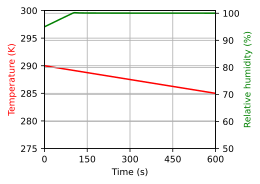

HTML(value="<a href='./tmpbxbwn7p2.pdf' target='_blank'>./tmpbxbwn7p2.pdf</a><br>")

In [18]:
plt.plot(data['elapsed_time'], data['temp'], 'r')
plt.ylabel('Temperature (K)', color='r')
plt.ylim([275, 300])
plt.xticks(np.linspace(0, data['elapsed_time'][-1], 5))
plt.xlim([0, data['elapsed_time'][-1]])
plt.xlabel('Time (s)')
plt.twinx()
plt.plot(data['elapsed_time'], data['rh'] * 100, 'g')
plt.ylabel('Relative humidity (%)', color='g')
plt.ylim([50, 101])
show_plot()

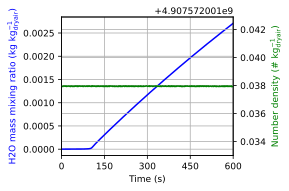

HTML(value="<a href='./tmpy8sx2i4y.pdf' target='_blank'>./tmpy8sx2i4y.pdf</a><br>")

In [19]:
plt.plot(
    data['elapsed_time'],
    data['total_mass_conc'] / data['air_density'],
    "b", label="mass conc"
)
plt.ylabel(r"H2O mass mixing ratio (kg kg$_{\rm dry air}^{-1}$)", color='b')
plt.xlabel("Time (s)")
plt.twinx()
plt.plot(
    data['elapsed_time'],
    data['total_num_conc'] / data['air_density'],
    "g", label="num conc"
)
plt.xticks(np.linspace(0, data['elapsed_time'][-1], 5))
plt.xlim([data['elapsed_time'][0], data['elapsed_time'][-1]])
plt.ylabel(r"Number density ($\#$ kg$_{\rm dry air}^{-1}$)", color='g')
show_plot()

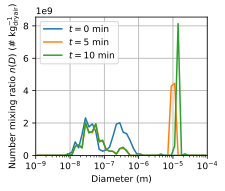

HTML(value="<a href='./tmpmp949v64.pdf' target='_blank'>./tmpmp949v64.pdf</a><br>")

In [20]:
for i in (0, 5, 10):
    plt.plot(
        diam_grid.centers,
        data['dists'][i * 60 * si.s / run_part_opt.del_t],
        label=f'$t = {i}$ min'
    )
plt.xscale("log")
plt.xlabel("Diameter (m)")
plt.ylabel(r"Number mixing ratio $n(D)$ ($\#$ kg$_{\rm dry air}^{-1}$)")
plt.ylim(bottom=0)
plt.legend()
plt.xlim(diam_grid.edges[0], diam_grid.edges[-1])
show_plot()